In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

Imagine a building that uses a complex energy consumption system to regulate its temperature and lighting. 
The energy consumption system has several variables that affect its efficiency, such as the temperature setpoint, lighting levels, and ventilation rates. 
The function J(x) = x2 - 4x + 3 can be seen as a simplified model of the efficiency of the energy consumption system, where x represents one of the variables that affect the system's efficiency. 
For example, x could represent the temperature setpoint. By adjusting the value of x using Gradient Descent, the building managers can find the optimal temperature setpoint that would minimize the value of the cost function and result in the most efficient energy consumption system. This optimization would result in lower energy consumption costs and reduced carbon emissions, while still maintaining a comfortable environment for the building occupants. You will be implementing the Gradient Descent algorithm to find the minimum of the quadratic cost function. 

Gradient Descent is an iterative optimization algorithm that is commonly used to minimize a cost function by adjusting the parameters of a model. 
The algorithm works by iteratively updating the parameters in the opposite direction of the gradient of the cost function. 
The learning rate determines the size of the step taken in the opposite direction of the gradient.



In [2]:
#defining the cost function
def cost_func():
    x = sp.symbols('x')
    y = x**2-4*x+3
    return y

In [3]:
#defining the gradient/derivative calculation
def calc_gradient(x_input):
    x = sp.symbols('x')
    cf = cost_func()
    yprime = cf.diff(x)
    return yprime.subs(x,x_input)

In [4]:
#for x_updated calulate the y value corresponding to x updated to plot them on the curve
def cal_cost_func_val(x_input):
    x = sp.symbols('x')
    y = cost_func()
    return y.subs(x,x_input)

In [5]:
#define gradient descent using alpha and no_of_iters
def gradient_descent(x,alpha,num_iters):
    x_history = []
    cf_history = []
    for i in range(num_iters):
        x_final = x - alpha*calc_gradient(x)
        x_history.append(x_final)
        cf_history.append(cal_cost_func_val(x_final))
        x= x_final
    return x_history,cf_history

In [6]:
def plot_graphs(x,alpha,cf_history,x_history,lr_strategy):
    figure = plt.figure(figsize=(18,4))
    plt.subplot(1,3,1)
    plt.plot(cf_history, 'ro-')
    plt.xlabel('Iterations')
    plt.ylabel('Cost Function')
    plt.title('Cost Function Vs No of Iterations')

    plt.subplot(1,3,2)
    plt.plot(x_history, 'bo-')
    plt.xlabel('Iterations')
    plt.ylabel('X_updated')
    plt.title('X Updated Vs No of Iterations')


    plt.subplot(1,3,3)
    x_cords = range(-x,x)
    y_cords = [x**2-4*x+3 for x in x_cords]
    plt.plot(x_cords, y_cords)
    plt.plot(x_history, cf_history,'go-')
    plt.legend(["Costfunction", "Xupdated with GD"], loc ="best") 
    plt.title(f'Gradient Descent:Alpha:{alpha} & strategy={lr_strategy}')
    plt.show()

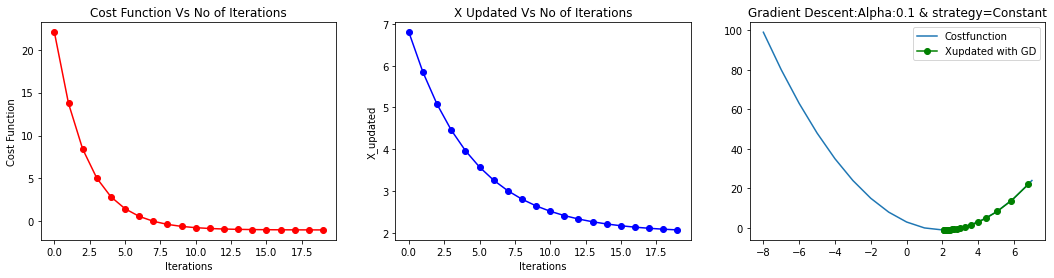

In [7]:
x=8
alpha = 0.1
num_iters = 20
x_history,cf_history = gradient_descent(x,alpha,num_iters)
plot_graphs(x,alpha,cf_history,x_history,"Constant")

#### Q2) Implementing different convergence criteria: 
    Convergence criteria for gradient descent refers to the condition under which the algorithm is considered to have found an acceptable solution. 
    There are several common convergence criteria for gradient descent, including, 

a) Maximum number of iterations: 
    
In the previous code, you have limited the number of iterations that the algorithm will perform. 
The algorithm stops after a fixed number of iterations, regardless of the change in the objective function.

b) Minimum change in objective function: 
    
The algorithm can also be stopped when the change in the objective function between consecutive iterations falls below a certain threshold (called tolerance), indicating that the algorithm has converged to a preferred minimum. 
In other words, we need some minimum improvement in the objective function value between consecutive iterations that is considered significant enough to continue the optimization process.
It is often specified as a small positive number, such as 1e-3 or 1e-6.
Choosing an appropriate tolerance value depends on the problem being solved and the computational resources available. 
A smaller tolerance value can lead to a more accurate solution but may require more iterations to achieve convergence, while a larger tolerance value can result in faster convergence but may not produce as accurate a solution. It is important to balance accuracy with computational efficiency when selecting a tolerance value for gradient descent.

In [8]:
#define gradient descent using alpha and no_of_iters and tolerance/stopping criteria
def gradient_descent_new(x,alpha,num_iters,tolerance):
    x_history = []
    cf_history = []
    for i in range(num_iters):
        x_final = x - alpha*calc_gradient(x)
        x_history.append(x_final)
        cf_history.append(cal_cost_func_val(x_final))
        if abs(x_final-x)<tolerance:
            print("Converged after", i+1, "iterations.")
            break
        else:
            x= x_final
#             print("Did not converge after", i+1, "iterations.")
#             print(x_history[i],cf_history[i])
    return x_history,cf_history

In [9]:
x=100
alpha = 0.1
num_iters = 50
tol = 1e-3
x_history,cf_history = gradient_descent_new(x,alpha,num_iters,tol)

Converged after 46 iterations.


In [10]:
x=-8
alpha = 0.1
num_iters = 50
tol = 1e-3
x_history,cf_history = gradient_descent_new(x,alpha,num_iters,tol)

Converged after 36 iterations.


In [11]:
x=0
alpha = 0.1
num_iters = 50
tol = 1e-3
x_history,cf_history = gradient_descent_new(x,alpha,num_iters,tol)

Converged after 28 iterations.


#### Q3) Comparison of performance for different initializations 

The initial values of the parameter (x) can have a significant impact on the performance of the algorithm. If the initial value is too large or too small, the algorithm may converge to a suboptimal solution in the given iterations.



Initialize the parameters with different values to study the impact of different initializations on the performance of Gradient Descent. You can use the above code to compare the performance of the different initializations in terms of convergence time. 



Select the initialization that gives the best result and use it for further experiments.
#### Inference:
If inital value is far away from the optimal point it takes more iterations to converge.

#### Q4) Impact of the learning rate

The learning rate is a crucial hyperparameter in Gradient Descent that determines the size 
of the step taken in the opposite direction of the gradient. 
If the learning rate is too small, the algorithm will take a long time to converge to the minimum.
If the learning rate is too large, the algorithm may overshoot the minimum and diverge. 
Experiment with different learning rates and plot the cost function values over the iterations to visualize the convergence.

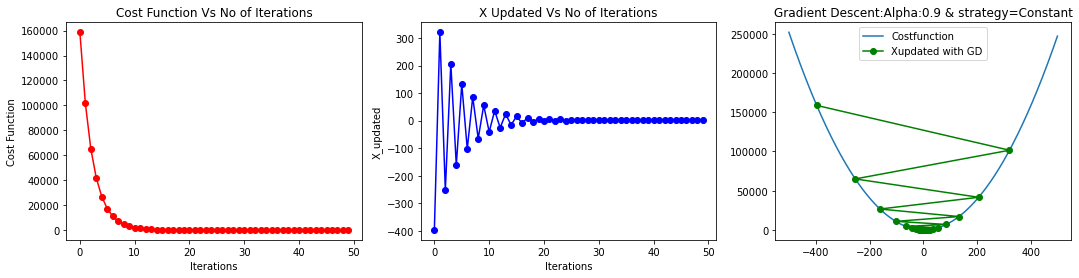

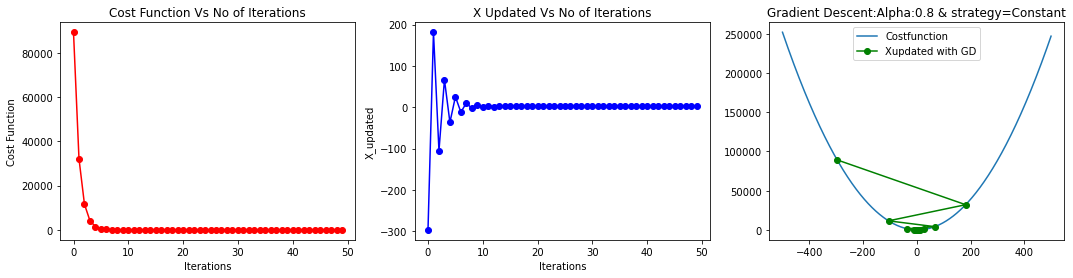

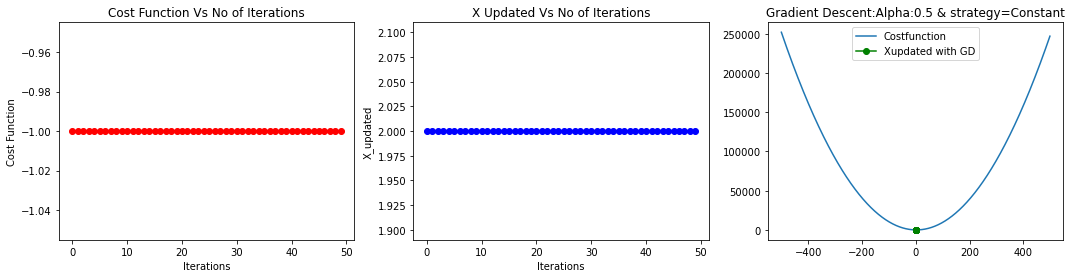

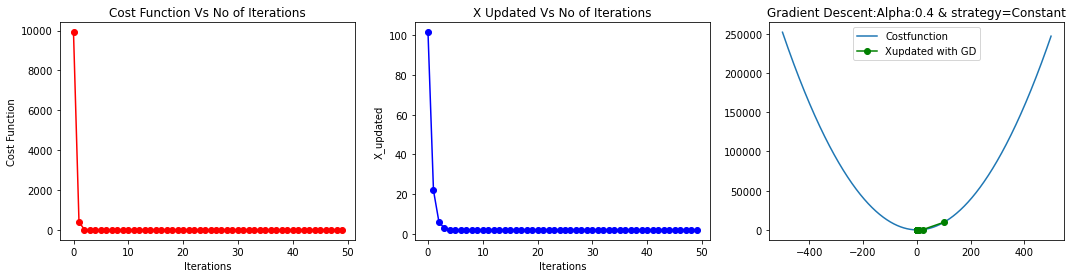

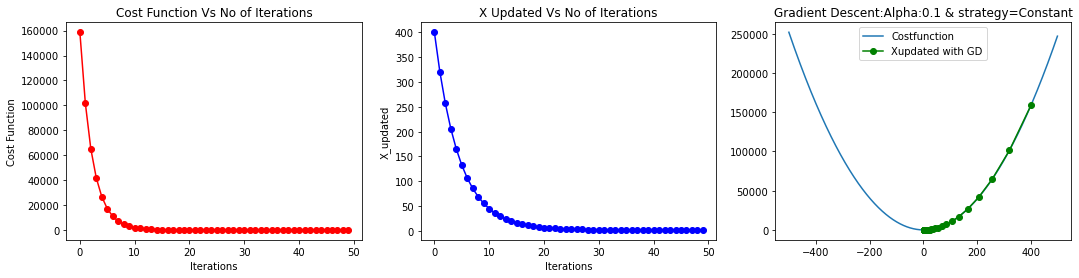

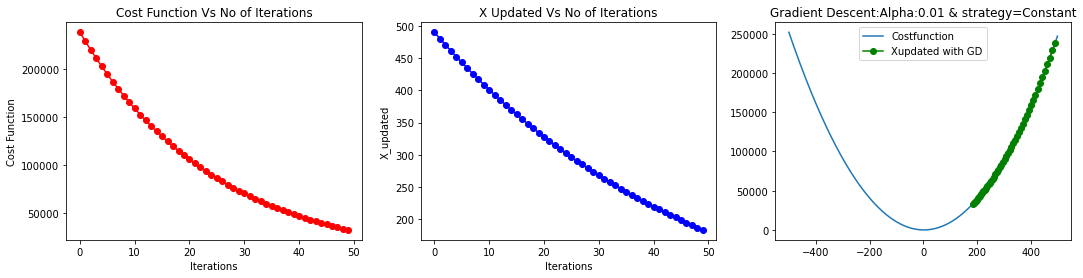

In [17]:
x=500
alphas = [0.9,0.8,0.5,0.4,0.1,0.01]
num_iters = 50
for i in range(len(alphas)):
    x_history,cf_history = gradient_descent(x,alphas[i],num_iters)
    plot_graphs(x,alphas[i],cf_history,x_history,"Constant")

## Inference:
> We can see that the costfunction didnt converge and the max iterations were exhausted 
> Lets see by increasing the number of iterations

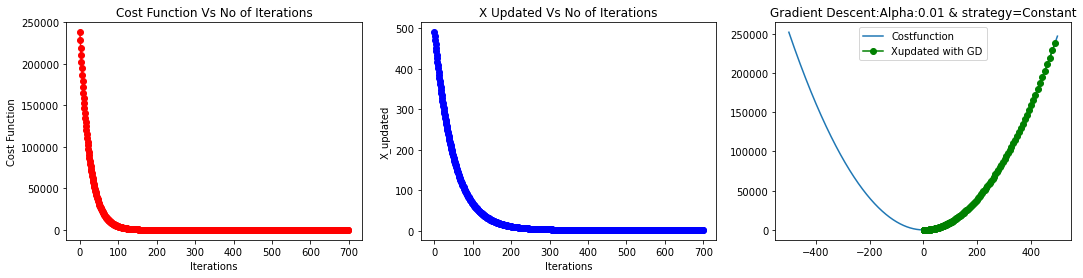

In [19]:
x=500
alpha = 0.01
num_iters = 700
x_history,cf_history = gradient_descent(x,alpha,num_iters)
plot_graphs(x,alpha,cf_history,x_history,"Constant")

In [20]:
print(min(x_history))
print(min(cf_history))

2.00035932077483
-0.999999870888581


### Learning rate strategy: Constant or Inverse scaling

> It decreases the learning rate over time according to a schedule. A common schedule is to divide the learning rate by the square root of the iteration number:
> alpha_t = alpha_0 / sqrt(t)
> where alpha0 is the initial learning rate and t is the iteration number. 
> This strategy is based on the intuition that as the algorithm approaches the minimum, the step size should become smaller to avoid overshooting it.

In [21]:
# define gradient descent using alpha and no_of_iters and lr strategy
# constant-> alpha doesnt change
# invscaling-> alpha changes from iteration to iteration alpha_t = alpha_0/sqrt(ith iteration)
# Adaptive->
def gradient_descent(x,alpha_0,num_iters,lr_strategy='constant'):
    
    x_history = [0 for i in range(num_iters+1)]
    cf_history = [0 for i in range(num_iters+1)]
    x_history[0] = x
    cf_history[0] = (cal_cost_func_val(x))
    if lr_strategy=='constant':     
        for i in range(num_iters):
            x_final = x - alpha*calc_gradient(x)
            x_history[i+1] = (x_final)
            cf_history[i+1] = (cal_cost_func_val(x_final))
            x = x_final
    elif lr_strategy == 'invscaling':
        alpha_t=alpha_0
        for i in range(num_iters):
            x_final = x - alpha_t*calc_gradient(x)
            alpha_t = alpha_0/np.sqrt(i+1)
            x_history[i+1] = (x_final)
            cf_history[i+1] = (cal_cost_func_val(x_final))
            x = x_final
    else:
            raise ValueError('Invalid learning rate strategy')
        
    return x_history,cf_history

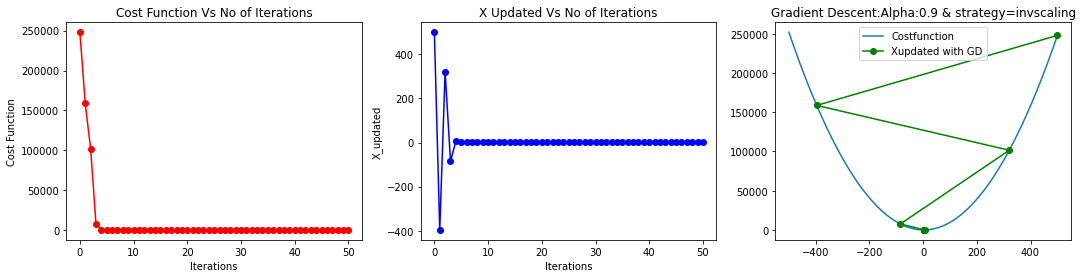

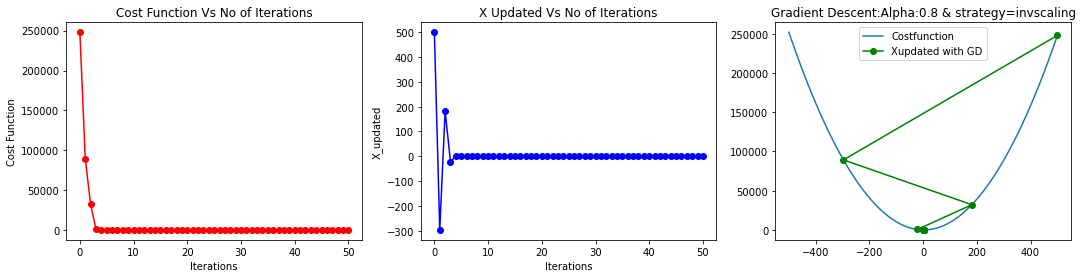

In [23]:
x=500
alphas = [0.9,0.8]
num_iters = 50
for i in range(len(alphas)):
    x_history,cf_history = gradient_descent(x,alphas[i],num_iters,'invscaling')
    plot_graphs(x,alphas[i],cf_history,x_history,"invscaling")

### Adaptive learning rate:
> It is a form of learning rate annealing or decay, 
> where the learning rate is reduced to prevent overshooting and oscillations.
> One common approach is to decrease the learning rate by a factor, such as dividing it by 5 or 10 if overshooting occurs. 
> The change in the sign of the gradient will indicate overshooting during optimization.

In [27]:
def gradient_descent(x,alpha,num_iters):
    x_history = [0 for i in range(num_iters+1)]
    cf_history = [0 for i in range(num_iters+1)]
    x_history[0] = x
    cf_history[0] = (cal_cost_func_val(x))
    gradient_sign = []
    for i in range(num_iters):
        gradient = calc_gradient(x)
        x_final = x - alpha*gradient
        x_history[i+1] = (x_final)
        cf_history[i+1] = (cal_cost_func_val(x_final))
        x = x_final
        #append the sign of gradient to gradient list 
        gradient_sign.append(np.sign(gradient))
        
        #Check the sign of the gradient to determine overshooting
        if i > 0 and np.sign(gradient_sign[-1])!= np.sign(gradient_sign[-2]):
            alpha /= 5
    return x_history, cf_history


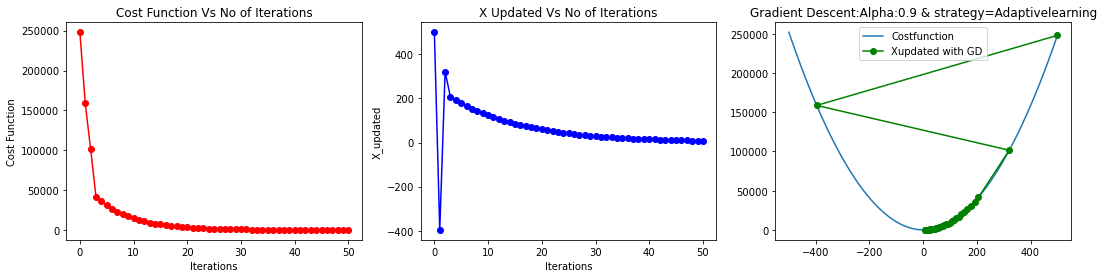

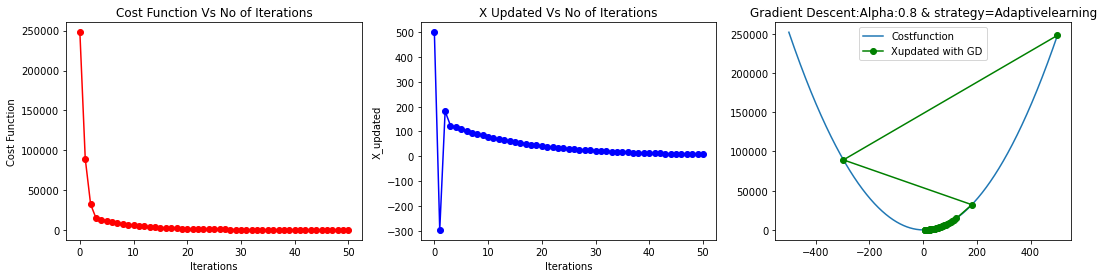

In [29]:
x=500
alphas = [0.9,0.8]
num_iters = 50
for i in range(len(alphas)):
    x_history,cf_history = gradient_descent(x,alphas[i],num_iters)
    plot_graphs(x,alphas[i],cf_history,x_history,"Adaptivelearning")

### Inference:
> when we implemented the same initialisation and alpha value without adaptive GD there many oscillations
> with the adaptive gradient descent we can obseve that the oscialltions are reduced